<a href="https://colab.research.google.com/github/yrodriguezmd/Fastai_Deep_Learning/blob/main/FAI_Apply06_multicat_Aquarium_July27_keep!.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()
from fastbook import *
#!pip install fastai -U
import fastai
from fastai.vision.all import *

     |████████████████████████████████| 720 kB 4.1 MB/s 
     |████████████████████████████████| 1.2 MB 50.3 MB/s 
     |████████████████████████████████| 188 kB 54.5 MB/s 
     |████████████████████████████████| 46 kB 4.1 MB/s 
     |████████████████████████████████| 54 kB 2.6 MB/s 
     |████████████████████████████████| 51 kB 286 kB/s 
Mounted at /content/gdrive


In [ ]:
#from google.colab import drive
#drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
# data source: https://public.roboflow.com/object-detection/aquarium
path = Path('gdrive/My Drive/Aquarium')

In [ ]:
#path.ls()

(#6) [Path('gdrive/My Drive/Aquarium/README.dataset.txt'),Path('gdrive/My Drive/Aquarium/README.roboflow.txt'),Path('gdrive/My Drive/Aquarium/.DS_Store'),Path('gdrive/My Drive/Aquarium/test'),Path('gdrive/My Drive/Aquarium/valid'),Path('gdrive/My Drive/Aquarium/train')]

In [ ]:
#(path/'train').ls()

(#450) [Path('gdrive/My Drive/Aquarium/train/IMG_3188_jpeg_jpg.rf.747520ca7cf3643faf40accc5db68c4d.jpg'),Path('gdrive/My Drive/Aquarium/train/IMG_2412_jpeg_jpg.rf.31034ae005fc4ba75a20f94f91e4bbc5.jpg'),Path('gdrive/My Drive/Aquarium/train/IMG_8502_jpg.rf.81783141b72ae29e514d677ca0f5082d.jpg'),Path('gdrive/My Drive/Aquarium/train/IMG_2426_jpeg_jpg.rf.50808902673305d18d0d44531b5a8bfb.jpg'),Path('gdrive/My Drive/Aquarium/train/IMG_8357_jpg.rf.e2bd534646a7aa8e2cc4a767e41786e1.jpg'),Path('gdrive/My Drive/Aquarium/train/IMG_8402_jpg.rf.3a5e6ef286c3710d8440da541aa82f18.jpg'),Path('gdrive/My Drive/Aquarium/train/IMG_8594_jpg.rf.c5476deec8c02b1ed2d106d5bb1a883d.jpg'),Path('gdrive/My Drive/Aquarium/train/IMG_2435_jpeg_jpg.rf.90d0f2a9a2603d0d00e44c54ea34d8a1.jpg'),Path('gdrive/My Drive/Aquarium/train/IMG_8469_jpg.rf.7faf777e50196eee1e90df69e03fd778.jpg'),Path('gdrive/My Drive/Aquarium/train/IMG_2551_jpeg_jpg.rf.23441fda11b9de7fa39fb0a2ea3e7f4a.jpg')...]

In [ ]:
df = pd.read_csv(path/'train/_classes.csv')
df.head(6)

,filename,fish,jellyfish,penguin,puffin,shark,starfish,stingray
0,IMG_3131_jpeg_jpg.rf.fcf0ccd8dbf187344da242e29eeac0cb.jpg,0,0,0,1,0,0,0
1,IMG_8406_jpg.rf.fda4b68f345bda8047e7f15060f70e45.jpg,1,0,0,0,1,0,0
2,IMG_3147_jpeg_jpg.rf.fc4622004ff72e58b546635774372fe2.jpg,0,0,0,1,0,0,0
3,IMG_2383_jpeg_jpg.rf.fd376436d382e985e3c0e6936860212f.jpg,0,0,0,0,0,1,0
4,IMG_2541_jpeg_jpg.rf.fc997b87790e715d47ce1cc83edf79c2.jpg,0,0,0,0,0,1,0
5,IMG_3138_jpeg_jpg.rf.ff253449ce146d664f1c0fb5f7f25ef5.jpg,0,0,0,1,0,0,0


In [ ]:
df[' fish'] = df[' fish'].replace(1, 'fish')
df[' jellyfish'] = df[' jellyfish'].replace(1, 'jellyfish')
df[' penguin'] = df[' penguin'].replace(1, 'penguin')
df[' puffin'] = df[' puffin'].replace(1, 'puffin')
df[' shark'] = df[' shark'].replace(1, 'shark')
df[' starfish'] = df[' starfish'].replace(1, 'starfish')
df[' stingray'] = df[' stingray'].replace(1, 'stingray')

df.head()

,filename,fish,jellyfish,penguin,puffin,shark,starfish,stingray
0,IMG_3131_jpeg_jpg.rf.fcf0ccd8dbf187344da242e29eeac0cb.jpg,0,0,0,puffin,0,0,0
1,IMG_8406_jpg.rf.fda4b68f345bda8047e7f15060f70e45.jpg,fish,0,0,0,shark,0,0
2,IMG_3147_jpeg_jpg.rf.fc4622004ff72e58b546635774372fe2.jpg,0,0,0,puffin,0,0,0
3,IMG_2383_jpeg_jpg.rf.fd376436d382e985e3c0e6936860212f.jpg,0,0,0,0,0,starfish,0
4,IMG_2541_jpeg_jpg.rf.fc997b87790e715d47ce1cc83edf79c2.jpg,0,0,0,0,0,starfish,0


In [ ]:
df.replace(0, '0', inplace=True)

df['animals'] = df[' fish'].str.cat(df[[' jellyfish', ' penguin', ' puffin', ' shark',' starfish',' stingray']], sep = ' ')
df

,filename,fish,jellyfish,penguin,puffin,shark,starfish,stingray,animals
0,IMG_3131_jpeg_jpg.rf.fcf0ccd8dbf187344da242e29eeac0cb.jpg,0,0,0,puffin,0,0,0,0 0 0 puffin 0 0 0
1,IMG_8406_jpg.rf.fda4b68f345bda8047e7f15060f70e45.jpg,fish,0,0,0,shark,0,0,fish 0 0 0 shark 0 0
2,IMG_3147_jpeg_jpg.rf.fc4622004ff72e58b546635774372fe2.jpg,0,0,0,puffin,0,0,0,0 0 0 puffin 0 0 0
3,IMG_2383_jpeg_jpg.rf.fd376436d382e985e3c0e6936860212f.jpg,0,0,0,0,0,starfish,0,0 0 0 0 0 starfish 0
4,IMG_2541_jpeg_jpg.rf.fc997b87790e715d47ce1cc83edf79c2.jpg,0,0,0,0,0,starfish,0,0 0 0 0 0 starfish 0
...,...,...,...,...,...,...,...,...,...
443,IMG_2540_jpeg_jpg.rf.648b31d1066b616be81fb9447de85358.jpg,0,0,0,0,0,starfish,0,0 0 0 0 0 starfish 0
444,IMG_2390_jpeg_jpg.rf.64fe0a0c9bb0459e06335b75d455ffb2.jpg,0,0,0,0,0,starfish,0,0 0 0 0 0 starfish 0
445,IMG_8581_MOV-0_jpg.rf.655f2e11059aeb33350230db32b7f927.jpg,fish,0,0,0,0,0,stingray,fish 0 0 0 0 0 stingray
446,IMG_2480_jpeg_jpg.rf.65112653d4f14fcd3431eed42833146e.jpg,0,jellyfish,0,0,0,0,0,0 jellyfish 0 0 0 0 0


In [ ]:
df.animals.replace('0 0 0 0 0 0 0', 'None', inplace=True)
df.head() 

,filename,fish,jellyfish,penguin,puffin,shark,starfish,stingray,animals
0,IMG_3131_jpeg_jpg.rf.fcf0ccd8dbf187344da242e29eeac0cb.jpg,0,0,0,puffin,0,0,0,0 0 0 puffin 0 0 0
1,IMG_8406_jpg.rf.fda4b68f345bda8047e7f15060f70e45.jpg,fish,0,0,0,shark,0,0,fish 0 0 0 shark 0 0
2,IMG_3147_jpeg_jpg.rf.fc4622004ff72e58b546635774372fe2.jpg,0,0,0,puffin,0,0,0,0 0 0 puffin 0 0 0
3,IMG_2383_jpeg_jpg.rf.fd376436d382e985e3c0e6936860212f.jpg,0,0,0,0,0,starfish,0,0 0 0 0 0 starfish 0
4,IMG_2541_jpeg_jpg.rf.fc997b87790e715d47ce1cc83edf79c2.jpg,0,0,0,0,0,starfish,0,0 0 0 0 0 starfish 0


In [ ]:
df [df.animals == 'None']

,filename,fish,jellyfish,penguin,puffin,shark,starfish,stingray,animals
249,IMG_3133_jpeg_jpg.rf.f439b9d382fd153b96f0a88cdf169172.jpg,0,0,0,0,0,0,0,None


In [ ]:
import re
def clean(text):
    text = re.sub('[0-9]+','', str(text))
    text = re.sub(r'/^\s+|\s+$|s+(?=\s)/g', '', text)  
    text = text.strip() 
    return text

df['animals'] = df.animals.apply(clean)
df.head()

AttributeError: ignored

In [ ]:
dblock = DataBlock()
dsets = dblock.datasets(df)

len(dsets.train), len(dsets.valid)

(359, 89)

In [ ]:
# calling on just filename will not give the image,
#   need path
def get_x(r):
  return path/'train'/r.filename ## original
  
def get_y(r): 
  return r.animals.split(' ')

dblock = DataBlock(get_x = get_x,
                   get_y = get_y)
dsets = dblock.datasets(df)
dsets.train[0]

(Path('gdrive/My Drive/Aquarium/train/IMG_3137_jpeg_jpg.rf.f066fa3a50b9e2b392c9889bc3caaff8.jpg'),
 ['', '', '', 'puffin', '', '', ''])

In [ ]:
# calling on just filename will not give the image,
#   need path
def get_x(r):
  return path/'train'/r.filename 

def get_y(r): 
  #r.animals = r.animals.apply(clean)
  return r.animals.split(' ')

dblock = DataBlock(get_x = get_x,
                   get_y = get_y)
dsets = dblock.datasets(df)
dsets.train[0]

(Path('gdrive/My Drive/Aquarium/train/IMG_8496_MOV-3_jpg.rf.ace3fc49d60c36ebd061bf9136264aea.jpg'),
 ['fish', '', '', '', 'shark'])

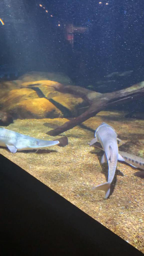

In [ ]:
Image.open(dsets.train[0][0]).to_thumb(256,256)

In [ ]:
dblock = DataBlock(blocks = (ImageBlock, MultiCategoryBlock),
                   get_x = get_x,
                   get_y = get_y)
dsets = dblock.datasets(df)
dsets.train[0][1]

TensorMultiCategory([0., 0., 0., 0., 1., 0., 0., 0.])

In [ ]:
dsets.train.vocab

['', 'fish', 'jellyfish', 'penguin', 'puffin', 'shark', 'starfish', 'stingray']

In [ ]:
torch.where(dsets.train[0][1] ==1)

(TensorMultiCategory([4]),)

In [ ]:
dblock = DataBlock(blocks = (ImageBlock, MultiCategoryBlock),
                   get_x = get_x,
                   get_y = get_y,
                   splitter = RandomSplitter(seed =42),
                   item_tfms = Resize(460),
                   batch_tfms = aug_transforms(size = 300,
                                            max_rotate = 30, max_zoom = 1.2))

dls = dblock.dataloaders(df)

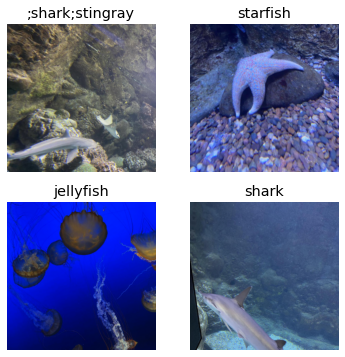

In [ ]:
# train[0] works with datasets
# show_batch work with dataloaders
dls.show_batch(nrows=2, ncols=2)

In [ ]:
learn = cnn_learner(dls, resnet18, 
                    metrics = partial(accuracy_multi, 
                                      thresh = 0.5, sigmoid = True))
learn.fine_tune(4, freeze_epochs = 1)

epoch,train_loss,valid_loss,accuracy_multi,time
0,1.014444,0.929866,0.519663,00:12


epoch,train_loss,valid_loss,accuracy_multi,time
0,0.860455,0.705484,0.591292,00:05
1,0.822453,0.567763,0.717697,00:05
2,0.758234,0.516462,0.769663,00:05
3,0.720905,0.506936,0.769663,00:05


In [ ]:
# trying deeper models, using mixed precision
# fine tune default lr_max = None, base_lr = 0.002



from fastai.callback.fp16 import *
learn_34 = cnn_learner(dls, resnet34, metrics = partial(accuracy_multi, 
                                      thresh = 0.5, sigmoid = True)).to_fp16()
learn_34.fine_tune(4, freeze_epochs = 1)

Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth


epoch,train_loss,valid_loss,accuracy_multi,time
0,0.973181,1.327299,0.487360,00:06


epoch,train_loss,valid_loss,accuracy_multi,time
0,0.690786,0.814153,0.616573,00:06
1,0.636241,0.648550,0.713483,00:06
2,0.590787,0.502407,0.780899,00:05
3,0.555570,0.453499,0.810393,00:06


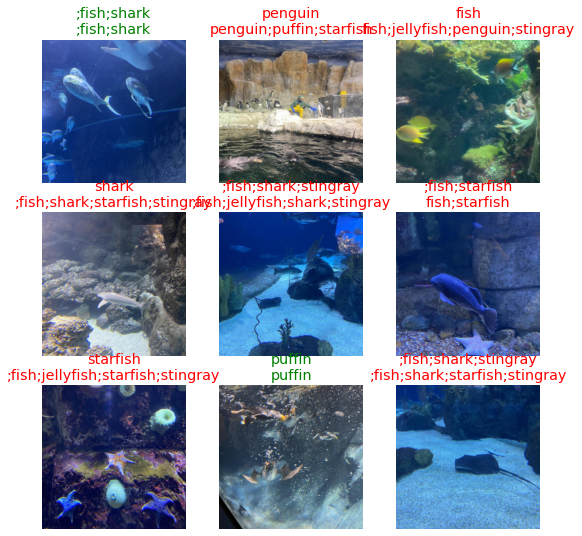

In [ ]:
learn.show_results()

In [ ]:
# trying deeper models, using mixed precision
# fine tune default lr_max = None, base_lr = 0.002
#from fastai.callback.fp16 import *
learn_34 = cnn_learner(dls, resnet34, metrics = partial(accuracy_multi, 
                                      thresh = 0.5, sigmoid = True))
learn_34.fine_tune(4, freeze_epochs = 1)

epoch,train_loss,valid_loss,accuracy_multi,time
0,1.035040,0.748296,0.582865,00:06


epoch,train_loss,valid_loss,accuracy_multi,time
0,0.875639,0.649587,0.640449,00:06
1,0.801897,0.624332,0.696629,00:06
2,0.741299,0.591499,0.723315,00:06
3,0.697547,0.559562,0.728933,00:06


In [ ]:
# trying deeper models, using mixed precision
# fine tune default lr_max = None, base_lr = 0.002
#from fastai.callback.fp16 import *
learn_34 = cnn_learner(dls, resnet50, metrics = partial(accuracy_multi, 
                                      thresh = 0.5, sigmoid = True))
learn_34.fine_tune(4, freeze_epochs = 1)

epoch,train_loss,valid_loss,accuracy_multi,time
0,0.963411,0.861386,0.651685,00:06


epoch,train_loss,valid_loss,accuracy_multi,time
0,0.710696,0.726291,0.630618,00:06
1,0.655283,0.611924,0.717697,00:06
2,0.592185,0.515337,0.783708,00:06
3,0.550720,0.467468,0.807584,00:06


In [ ]:
# trying deeper models, using mixed precision
# fine tune default lr_max = None, base_lr = 0.002
#from fastai.callback.fp16 import *
learn_34 = cnn_learner(dls, resnet50, metrics = partial(accuracy_multi, 
                                      thresh = 0.5, sigmoid = True))
learn_34.fine_tune(4, freeze_epochs = 2)

epoch,train_loss,valid_loss,accuracy_multi,time
0,0.971257,1.070202,0.490169,00:06
1,0.855028,0.784467,0.706461,00:06


epoch,train_loss,valid_loss,accuracy_multi,time
0,0.575498,0.677529,0.693820,00:06
1,0.543850,0.569150,0.742977,00:06
2,0.498564,0.434627,0.806180,00:06
3,0.468587,0.400917,0.839888,00:06


In [ ]:
# trying deeper models, using mixed precision
# fine tune default lr_max = None, base_lr = 0.002
#from fastai.callback.fp16 import *
learn_34 = cnn_learner(dls, resnet50, metrics = partial(accuracy_multi, 
                                      thresh = 0.5, sigmoid = True))
learn_34.fine_tune(8, freeze_epochs = 1)

epoch,train_loss,valid_loss,accuracy_multi,time
0,0.990337,1.355541,0.464888,00:06


epoch,train_loss,valid_loss,accuracy_multi,time
0,0.686861,0.744421,0.625000,00:06
1,0.653329,0.604352,0.710674,00:06
2,0.596343,0.589992,0.748595,00:06
3,0.547839,0.451661,0.825843,00:06
4,0.506954,0.398549,0.862360,00:06
5,0.466778,0.372188,0.875000,00:06
6,0.438791,0.344544,0.886236,00:06
7,0.409532,0.332923,0.890449,00:06


In [ ]:
# trying deeper models, using mixed precision
# fine tune default lr_max = None, base_lr = 0.002
#from fastai.callback.fp16 import *
learn = cnn_learner(dls, resnet50, metrics = partial(accuracy_multi, 
                                      thresh = 0.5, sigmoid = True))
learn.fine_tune(8, freeze_epochs = 2)

epoch,train_loss,valid_loss,accuracy_multi,time
0,0.969255,1.271815,0.450843,00:06
1,0.832276,0.926405,0.634831,00:06


epoch,train_loss,valid_loss,accuracy_multi,time
0,0.590973,0.732108,0.668539,00:06
1,0.559510,0.563772,0.759831,00:06
2,0.524819,0.462787,0.810393,00:06
3,0.482774,0.417485,0.834270,00:06
4,0.445907,0.401841,0.856742,00:06
5,0.419446,0.375641,0.870786,00:06
6,0.393970,0.340379,0.883427,00:06
7,0.370412,0.321758,0.889045,00:06


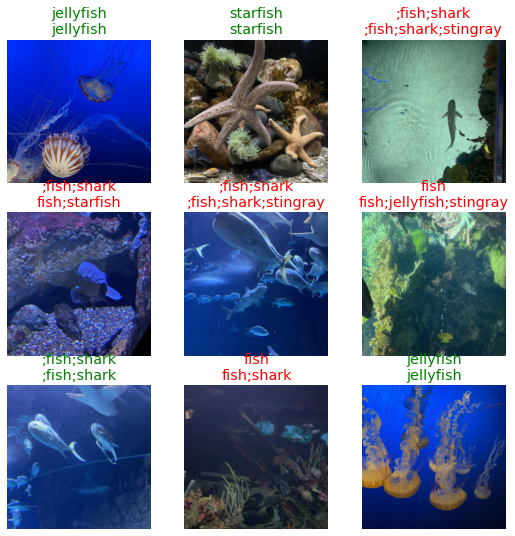

In [ ]:
learn.show_results()

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)

interp.most_confused(min_val = 10)
# need further text cleaning

[('', 'fish', 153), ('fish', '', 11)]

,target,predicted,probabilities,loss
0,fish,;fish;puffin;shark;starfish;stingray,"TensorBase([0.9824, 0.9671, 0.4340, 0.0436, 0.6349, 0.8858, 0.5804, 0.7142])",1.2479362487792969
1,,puffin;stingray,"TensorBase([0.0286, 0.0337, 0.3729, 0.2625, 0.9708, 0.0949, 0.1497, 0.6377])",1.1462337970733643
2,;fish;shark,fish;starfish;stingray,"TensorBase([0.3190, 0.6271, 0.2670, 0.1713, 0.4828, 0.2255, 0.9800, 0.5709])",1.1270886659622192
3,fish,;fish;shark;starfish,"TensorBase([0.5604, 0.5946, 0.4872, 0.2454, 0.1151, 0.9815, 0.7472, 0.1769])",0.9967200756072998
4,;fish;shark,;fish;puffin;starfish;stingray,"TensorBase([0.8213, 0.6597, 0.3794, 0.0876, 0.7417, 0.4581, 0.9746, 0.6111])",0.9918301105499268
5,fish,;fish;shark;starfish;stingray,"TensorBase([0.8631, 0.9807, 0.3353, 0.1204, 0.4635, 0.9185, 0.6148, 0.5983])",0.9425615668296814


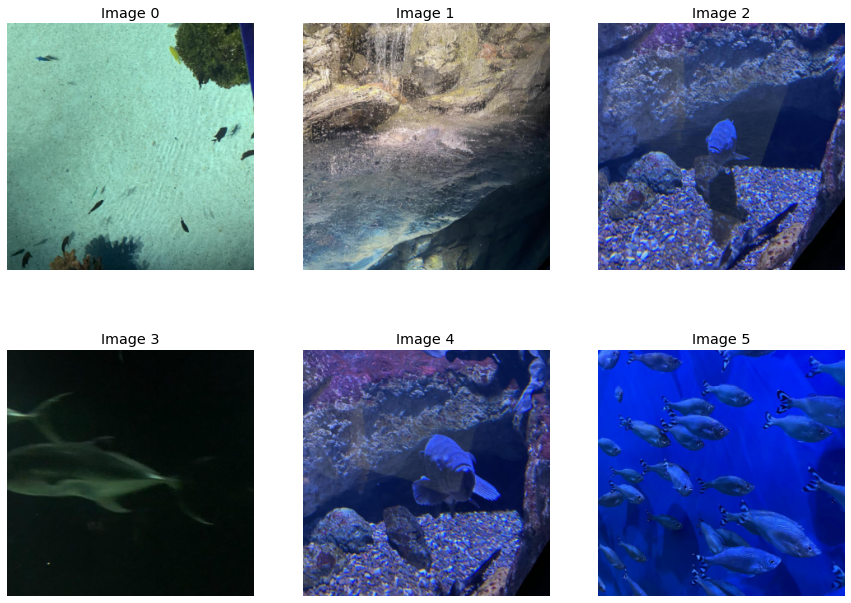

In [ ]:
interp.plot_top_losses(6, figsize = (15,11))